In [29]:
%run -i writefile2.py

In [32]:
%%writefile2

import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import math
import require
import os
get_oxford_df = require.single( "get_oxford_df" )

def get_oxford_categorical_flagged( country, indicator, verbose = True ):

    series_file = f"data/{ indicator }.csv"
    flag_file = f"data/{ indicator.split( '_' )[ 0 ]}_flag.csv"
    
    series_df = get_oxford_df( series_file, country )

    if not os.path.exists( flag_file ):

        flag_df = series_df.copy( )
        flag_df.series = 1.0
    
    else:
    
            flag_df = get_oxford_df( flag_file, country )
    
    flag_df.columns = [ "flag" ]

    if verbose:

        display( HTML( f"<h1>{ indicator.replace( '_', ' ' )} in { country }</h1>" ))

    dual_df = pd.concat([ series_df, flag_df ], axis = 1 )
    
    if verbose:

        display( HTML( f"<h3>series & flag</h3></p>Note: the Nan values for flag correspond exactly to the times where no measure was taken, it is not missing data<p>" ))
        dual_df.plot( )
        plt.show( )

    masked_series = (( flag_df.flag == 1 ) * series_df.series )

    if verbose:

        display( HTML( f"<h3>masked series</h3><p>filtered out only measures that are nation-wide and not only regionally targeted</p>" ))
        masked_series.plot( )
        plt.show( )

    nnz_values = [ v for v in masked_series.unique( ) if not math.isnan( v ) and not v == 0 ]
    nnz_values.sort( )

    if verbose:

        display( HTML( f"<h3>categorical non-zero values</h3><p>{ nnz_values }</p>" ))

    dummy_series = { f"{ v }": ( masked_series == v ).astype( int ) for v in nnz_values }

    if verbose:

        display( HTML( f"<h3>categorical-dummy series</h3>" ))
        
        n = len( dummy_series )
        fig, axs = plt.subplots( 1, n, figsize = ( 4 * n, 4 ))
        
        if( n > 1 ):
        
            axs = axs.ravel( )
        
        for i, ( v, series ) in enumerate( dummy_series.items( )):
        
            series.plot( title = v, ax = axs[ i ] if n > 1 else axs )
        
        plt.show( )
    
    return dummy_series

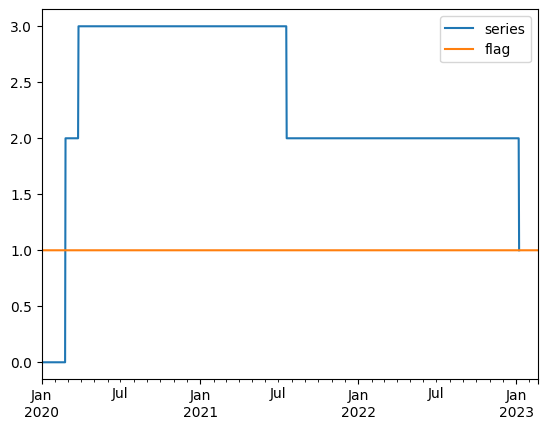

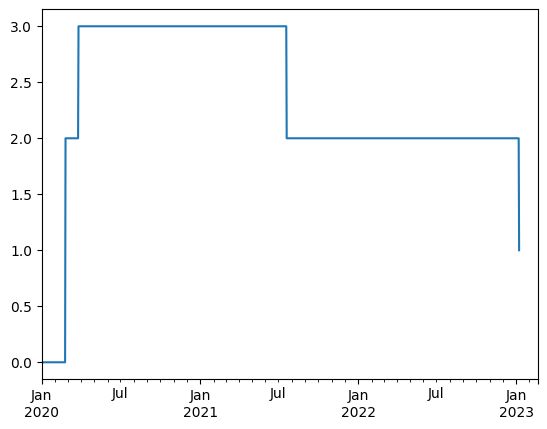

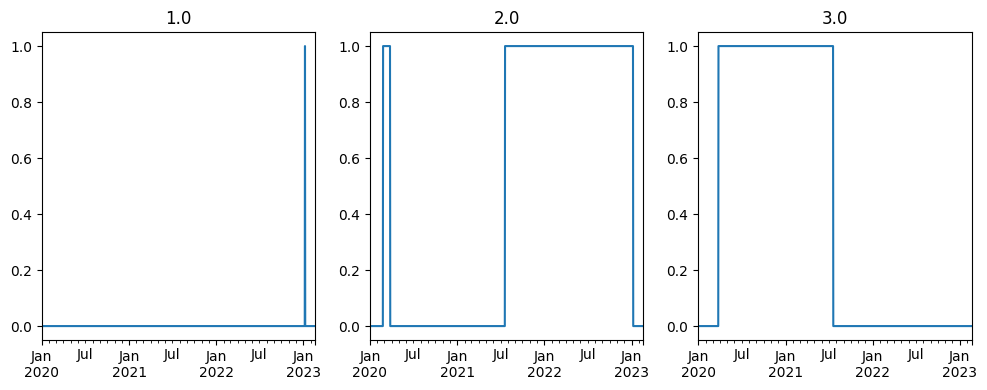

In [33]:
country = "China"
indicator = "c8ev_internationaltravel"
dummy_series = get_oxford_categorical_flagged( country, indicator )